# EDA

This notebook contains the whole EDA, including data assessment, data cleaning and data presentation.
My stakeholder is Thomas Hansen. He is a house buyer, has five kids, but not much money. He wonders about the best timing and location to buy a house. Additionally, he would want to have a nice (social) neighbourhood.



In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import altair as alt
import missingno as msno


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# import the data into a data frame
df_housing = pd.read_csv('data/eda.csv')

## Data Assessment
Looking at the properties of the data.

In [3]:
df_housing.head()

date      price    house_id  id        id.1  bedrooms  bathrooms  \
0  2014-10-13 221900.000  7129300520   1  7129300520     3.000      1.000   
1  2014-12-09 538000.000  6414100192   2  6414100192     3.000      2.250   
2  2015-02-25 180000.000  5631500400   3  5631500400     2.000      1.000   
3  2014-12-09 604000.000  2487200875   4  2487200875     4.000      3.000   
4  2015-02-18 510000.000  1954400510   5  1954400510     3.000      2.000   

   sqft_living  sqft_lot  floors  ...  grade  sqft_above  sqft_basement  \
0     1180.000  5650.000   1.000  ...      7    1180.000          0.000   
1     2570.000  7242.000   2.000  ...      7    2170.000        400.000   
2      770.000 10000.000   1.000  ...      6     770.000          0.000   
3     1960.000  5000.000   1.000  ...      7    1050.000        910.000   
4     1680.000  8080.000   1.000  ...      8    1680.000          0.000   

   yr_built  yr_renovated  zipcode    lat     long  sqft_living15  sqft_lot15  
0      1955         0.000    98178 47.511 -122.257       1340.000    5650.000  
1      1951     19910.000    98125 47.721 -122.319       1690.000    7639.000  
2      1933           NaN    98028 47.738 -122.233       2720.000    8062.000  
3      1965         0.000    98136 47.521 -122.393       1360.000    5000.000  
4      1987         0.000    98074 47.617 -122.045       1800.000    7503.000  

[5 rows x 23 columns]

In [4]:
df_housing.shape

(21597, 23)

In [5]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   house_id       21597 non-null  int64  
 3   id             21597 non-null  int64  
 4   id.1           21597 non-null  int64  
 5   bedrooms       21597 non-null  float64
 6   bathrooms      21597 non-null  float64
 7   sqft_living    21597 non-null  float64
 8   sqft_lot       21597 non-null  float64
 9   floors         21597 non-null  float64
 10  waterfront     19206 non-null  float64
 11  view           21534 non-null  float64
 12  condition      21597 non-null  int64  
 13  grade          21597 non-null  int64  
 14  sqft_above     21597 non-null  float64
 15  sqft_basement  21145 non-null  float64
 16  yr_built       21597 non-null  int64  
 17  yr_renovated   17749 non-null  float64
 18  zipcod

In [6]:
# check which columns I can remove:
# house_id, id, id.1

df_housing.columns

Index(['date', 'price', 'house_id', 'id', 'id.1', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
df_housing.drop(['house_id', 'id', 'id.1'], axis=1, inplace=True)

In [8]:
# Other problems with the column names?

df_housing.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
# Changing column names so that I can understand them better
df_housing = df_housing.rename({
    'date': 'selling_date', 
    'sqft_living': 'area_home', 
    'sqft_lot': 'area_lot',
    'sqft_above': 'area_above',
    'sqft_basement': 'area_basement',
    'sqft_living15': 'area_home_15_neighbours',
    'sqft_lot15': 'area_lot_15_neighbours'
    },axis=1)

In [10]:
df_housing.columns

Index(['selling_date', 'price', 'bedrooms', 'bathrooms', 'area_home',
       'area_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'area_above', 'area_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'area_home_15_neighbours', 'area_lot_15_neighbours'],
      dtype='object')

In [11]:
# checking for douplicated entries, but there are non. nice
df_housing.duplicated().value_counts()

False    21597
Name: count, dtype: int64

In [12]:
# checking for the data types
df_housing.dtypes

# problems: date is an object -> make datetime,
# bedrooms, bathrooms, floors, yr_renovated are floats, but should better be integers
# why are waterfront and view floats?

selling_date                object
price                      float64
bedrooms                   float64
bathrooms                  float64
area_home                  float64
area_lot                   float64
floors                     float64
waterfront                 float64
view                       float64
condition                    int64
grade                        int64
area_above                 float64
area_basement              float64
yr_built                     int64
yr_renovated               float64
zipcode                      int64
lat                        float64
long                       float64
area_home_15_neighbours    float64
area_lot_15_neighbours     float64
dtype: object

In [13]:
# what do those columns look like?
df_housing[['waterfront', 'view', 'condition']]

waterfront  view  condition
0             NaN 0.000          3
1           0.000 0.000          3
2           0.000 0.000          3
3           0.000 0.000          5
4           0.000 0.000          3
...           ...   ...        ...
21592       0.000 0.000          3
21593       0.000 0.000          3
21594       0.000 0.000          3
21595         NaN 0.000          3
21596       0.000 0.000          3

[21597 rows x 3 columns]

In [14]:
df_housing['waterfront'].unique()
# can become integer

array([nan,  0.,  1.])

In [15]:
df_housing['view'].unique()
# can become integer

array([ 0., nan,  3.,  4.,  2.,  1.])

In [16]:
# change dtype of the datees
df_housing['selling_date'] = pd.to_datetime(df_housing['selling_date'], format= '%Y-%m-%d')

In [17]:
# add columns for the specific selling date information
df_housing['selling_year'] = df_housing['selling_date'].dt.year
df_housing['selling_month'] = df_housing['selling_date'].dt.month
df_housing['selling_day'] = df_housing['selling_date'].dt.day
df_housing['selling_weekday'] = df_housing['selling_date'].dt.dayofweek


In [18]:
df_housing.head()

selling_date      price  bedrooms  bathrooms  area_home  area_lot  floors  \
0   2014-10-13 221900.000     3.000      1.000   1180.000  5650.000   1.000   
1   2014-12-09 538000.000     3.000      2.250   2570.000  7242.000   2.000   
2   2015-02-25 180000.000     2.000      1.000    770.000 10000.000   1.000   
3   2014-12-09 604000.000     4.000      3.000   1960.000  5000.000   1.000   
4   2015-02-18 510000.000     3.000      2.000   1680.000  8080.000   1.000   

   waterfront  view  condition  ...  yr_renovated  zipcode    lat     long  \
0         NaN 0.000          3  ...         0.000    98178 47.511 -122.257   
1       0.000 0.000          3  ...     19910.000    98125 47.721 -122.319   
2       0.000 0.000          3  ...           NaN    98028 47.738 -122.233   
3       0.000 0.000          5  ...         0.000    98136 47.521 -122.393   
4       0.000 0.000          3  ...         0.000    98074 47.617 -122.045   

   area_home_15_neighbours  area_lot_15_neighbours  selling_year  \
0                 1340.000                5650.000          2014   
1                 1690.000                7639.000          2014   
2                 2720.000                8062.000          2015   
3                 1360.000                5000.000          2014   
4                 1800.000                7503.000          2015   

   selling_month  selling_day  selling_weekday  
0             10           13                0  
1             12            9                1  
2              2           25                2  
3             12            9                1  
4              2           18                2  

[5 rows x 24 columns]

## Dealing with missing data
First get an overview about the data that is missing in order to come up with a strategy to deal with it.

In [19]:
# where do I miss data? (I know I miss data in waterfront, which I want to change as integer)
df_housing.isna().sum()

selling_date                  0
price                         0
bedrooms                      0
bathrooms                     0
area_home                     0
area_lot                      0
floors                        0
waterfront                 2391
view                         63
condition                     0
grade                         0
area_above                    0
area_basement               452
yr_built                      0
yr_renovated               3848
zipcode                       0
lat                           0
long                          0
area_home_15_neighbours       0
area_lot_15_neighbours        0
selling_year                  0
selling_month                 0
selling_day                   0
selling_weekday               0
dtype: int64

<Axes: >

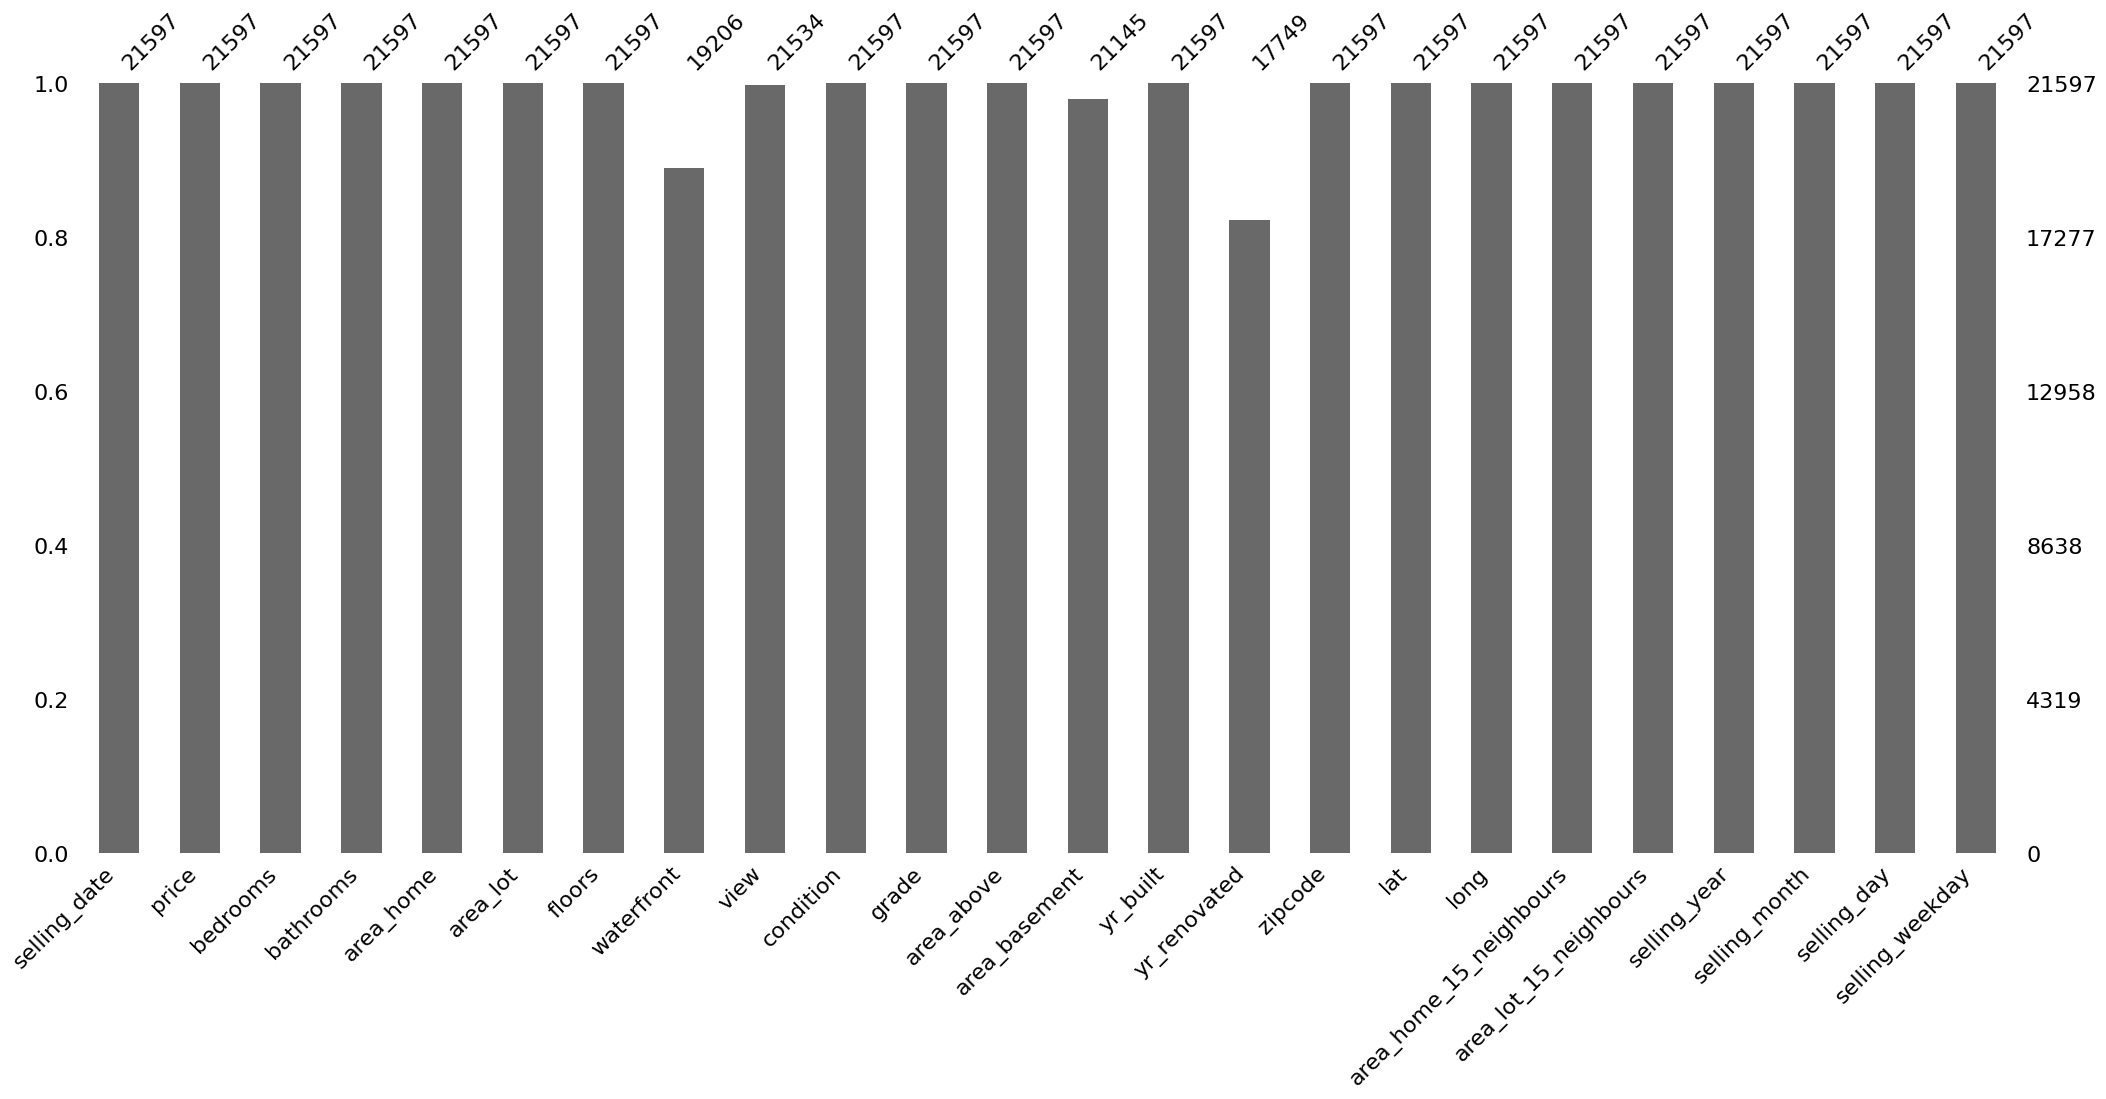

In [20]:
# plotting percentage of missing values per column
msno.bar(df_housing)

# Conclusions for the missing data

## waterfront:
Okay, I have missing values in waterfront, which is a boolean. Since it is a very nice feature of a house and a good selling point I think it is fair to assume that giving no answer here means that there is no waterfront view.

## view:
For the view it is a bit more difficult, because this is a ranking. Probably the ranking wasn't done here. Most correct would probably be to remove the columns, but for my client I think I am not really interested in the view und thus would loose the other data unnecessarily. I will just force them into 0s and not use the column for my EDA.

## area_basement:
Nan in area_basement probably means that there is no basement, so I will make it 0.

## yr_renovated:
Nan in yr_renovated most likely means that they have not been renovated, so I will put also a 0. If I use this column I will need to remember that I have to gate out the 0s.

In [21]:
df_housing = df_housing.fillna({
    'waterfront': 0,
    'view': 0,
    'area_basement': 0,
    'yr_renovated': 0
})

In [22]:
df_housing.isna().sum()

selling_date               0
price                      0
bedrooms                   0
bathrooms                  0
area_home                  0
area_lot                   0
floors                     0
waterfront                 0
view                       0
condition                  0
grade                      0
area_above                 0
area_basement              0
yr_built                   0
yr_renovated               0
zipcode                    0
lat                        0
long                       0
area_home_15_neighbours    0
area_lot_15_neighbours     0
selling_year               0
selling_month              0
selling_day                0
selling_weekday            0
dtype: int64

In [23]:
# changing the data type of the above mentioned columns to integers
# bedrooms, bathrooms, floors, yr_renovated, waterfront and view
df_housing = df_housing.astype({
    'bedrooms': int,
    'bathrooms': int,
    'floors': int,
    'yr_renovated': int,
    'waterfront': int,
    'view': int
})

In [24]:
df_housing.dtypes

selling_date               datetime64[ns]
price                             float64
bedrooms                            int64
bathrooms                           int64
area_home                         float64
area_lot                          float64
floors                              int64
waterfront                          int64
view                                int64
condition                           int64
grade                               int64
area_above                        float64
area_basement                     float64
yr_built                            int64
yr_renovated                        int64
zipcode                             int64
lat                               float64
long                              float64
area_home_15_neighbours           float64
area_lot_15_neighbours            float64
selling_year                        int32
selling_month                       int32
selling_day                         int32
selling_weekday                   

In [25]:
# so, now the last problem for me is that I have a hart time to deal with square feet. 
# I have to calculate it to square meters to be able to interpret it.
df_housing[['area_home', 'area_lot', 'area_above', 'area_basement', 'area_home_15_neighbours', 'area_lot_15_neighbours']].head()

area_home  area_lot  area_above  area_basement  area_home_15_neighbours  \
0   1180.000  5650.000    1180.000          0.000                 1340.000   
1   2570.000  7242.000    2170.000        400.000                 1690.000   
2    770.000 10000.000     770.000          0.000                 2720.000   
3   1960.000  5000.000    1050.000        910.000                 1360.000   
4   1680.000  8080.000    1680.000          0.000                 1800.000   

   area_lot_15_neighbours  
0                5650.000  
1                7639.000  
2                8062.000  
3                5000.000  
4                7503.000

In [26]:
# changing the unit of the areas
df_housing['area_home'] = df_housing.area_home.apply(lambda x: x/10.764)
df_housing['area_lot'] = df_housing.area_lot.apply(lambda x: x/10.764)
df_housing['area_above'] = df_housing.area_above.apply(lambda x: x/10.764)
df_housing['area_basement'] = df_housing.area_basement.apply(lambda x: x/10.764)
df_housing['area_home_15_neighbours'] = df_housing.area_home_15_neighbours.apply(lambda x: x/10.764)
df_housing['area_lot_15_neighbours'] = df_housing.area_lot_15_neighbours.apply(lambda x: x/10.764)

In [27]:
df_housing[['area_home', 'area_lot', 'area_above', 'area_basement', 'area_home_15_neighbours', 'area_lot_15_neighbours']].head()
# nice

area_home  area_lot  area_above  area_basement  area_home_15_neighbours  \
0    109.625   524.898     109.625          0.000                  124.489   
1    238.759   672.798     201.598         37.161                  157.005   
2     71.535   929.023      71.535          0.000                  252.694   
3    182.088   464.511      97.547         84.541                  126.347   
4    156.076   750.650     156.076          0.000                  167.224   

   area_lot_15_neighbours  
0                 524.898  
1                 709.680  
2                 748.978  
3                 464.511  
4                 697.046

# Starting the plotting
I think the data cleaning is done. I will now start looking at the data more closely.

So, let me remember what my objectives are:
- Thomas Hansen wants to buy a house.
- He has 5 kids, so he needs quite some space and also quite some bedrooms. Idk, like at least 100 m2 in area_home and at least 4 bedrooms. Better 6 actually, but since he is poor I will go down to 4.
So, we want minimal price for a maximum in area_home, area_lot (nice to have a garden with kids), bedrooms and bathrooms (with so many people at least 2, please... ^^")
- He wants a nice social neighbourhood. I still don't really know how I could quantify that, but things like view or waterfront will not be important for the client.

## Which factors could influence the pricing for my important categories?
- The selling timepoint might have an influence (time of the year, year).
- The location might have an influence. Are there some regions more affortable then others? Perhaps in the countryside?
- The condition, building year and state of renovation may also influence the pricing. The question is how much we want to go down on these to achieve what we want. I mean, an old, but renovated house is also nice, but a house in a bad condition will in the end cost more.

|Question|Hypothesis|
|---|---|
|Does the selling time of the year influence the price?| There is a timepoint that is optimal to buy a house |
|Does the location have an influence on the price?|Houses in the countryside or in certain regions are more affortable|
|Does the condition of the house have an influence on the price?|Houses in a worse condition are more affortable|


In [28]:
df_housing.columns

Index(['selling_date', 'price', 'bedrooms', 'bathrooms', 'area_home',
       'area_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'area_above', 'area_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'area_home_15_neighbours', 'area_lot_15_neighbours',
       'selling_year', 'selling_month', 'selling_day', 'selling_weekday'],
      dtype='object')

In [29]:
# check for correlations
corr_columns = ['price', 'bedrooms', 'bathrooms', 'area_home', 'area_lot', 'yr_built']
corr_mtrx = df_housing[corr_columns].corr()
corr_mtrx

price  bedrooms  bathrooms  area_home  area_lot  yr_built
price      1.000     0.309      0.511      0.702     0.090     0.054
bedrooms   0.309     1.000      0.466      0.578     0.032     0.156
bathrooms  0.511     0.466      1.000      0.699     0.086     0.435
area_home  0.702     0.578      0.699      1.000     0.173     0.318
area_lot   0.090     0.032      0.086      0.173     1.000     0.053
yr_built   0.054     0.156      0.435      0.318     0.053     1.000

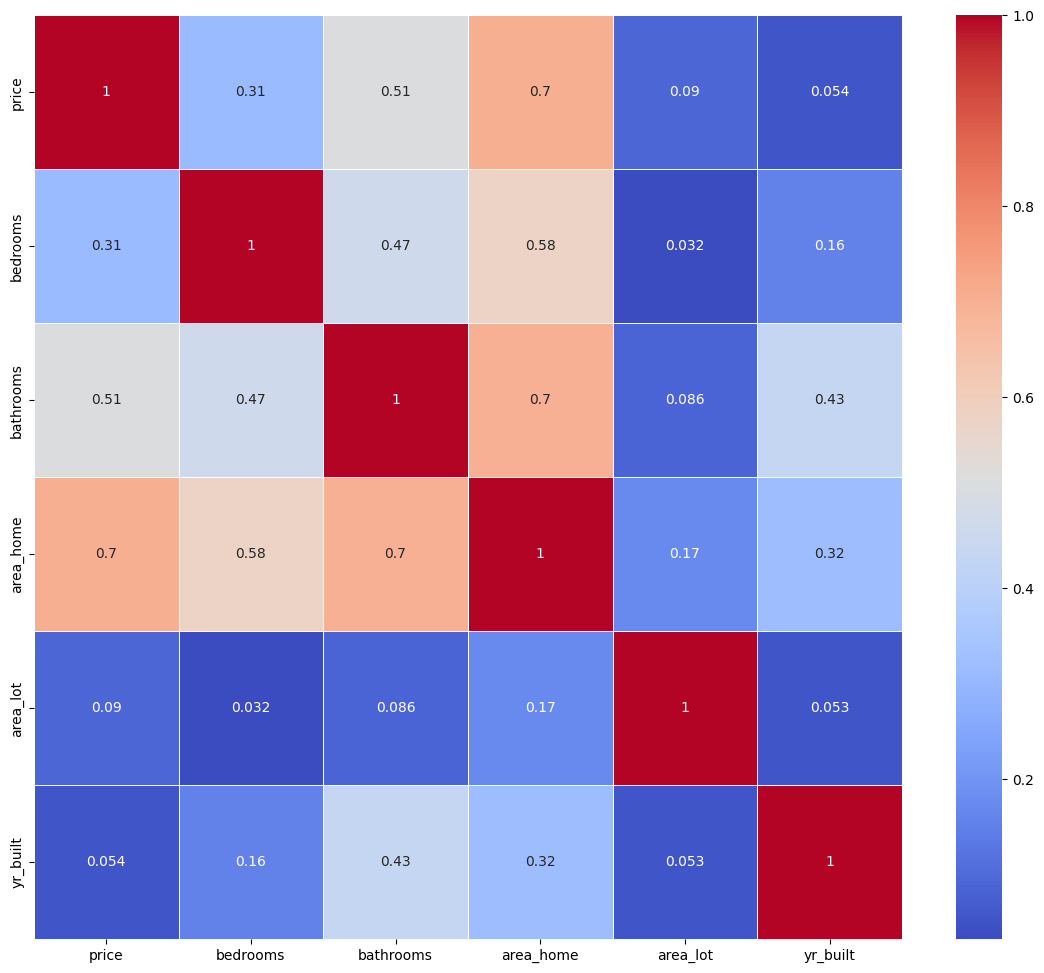

In [30]:
plt.figure(figsize=(14,12))
ax = sns.heatmap(corr_mtrx, linewidths=0.5, annot=True, cmap= 'coolwarm')

# Heatmap interpretation
Interesting. From the heatmap I conclude a correlation between the price and the home area as well as perhaps a bit of a correlation between price and bathrooms. But I don't see a correlation between the area of the lot or the number of bedrooms with the price. So we might be able to get something affortable that doesn't have a large home area, but at least many bedrooms and a large garden.

# Bedroom analysis

In [31]:
# lets check how the market looks like in terms of bedrooms
df_housing.groupby('bedrooms').count()

selling_date  price  bathrooms  area_home  area_lot  floors  \
bedrooms                                                                
1                  196    196        196        196       196     196   
2                 2760   2760       2760       2760      2760    2760   
3                 9824   9824       9824       9824      9824    9824   
4                 6882   6882       6882       6882      6882    6882   
5                 1601   1601       1601       1601      1601    1601   
6                  272    272        272        272       272     272   
7                   38     38         38         38        38      38   
8                   13     13         13         13        13      13   
9                    6      6          6          6         6       6   
10                   3      3          3          3         3       3   
11                   1      1          1          1         1       1   
33                   1      1          1          1         1       1   

          waterfront  view  condition  grade  ...  yr_renovated  zipcode  \
bedrooms                                      ...                          
1                196   196        196    196  ...           196      196   
2               2760  2760       2760   2760  ...          2760     2760   
3               9824  9824       9824   9824  ...          9824     9824   
4               6882  6882       6882   6882  ...          6882     6882   
5               1601  1601       1601   1601  ...          1601     1601   
6                272   272        272    272  ...           272      272   
7                 38    38         38     38  ...            38       38   
8                 13    13         13     13  ...            13       13   
9                  6     6          6      6  ...             6        6   
10                 3     3          3      3  ...             3        3   
11                 1     1          1      1  ...             1        1   
33                 1     1          1      1  ...             1        1   

           lat  long  area_home_15_neighbours  area_lot_15_neighbours  \
bedrooms                                                                
1          196   196                      196                     196   
2         2760  2760                     2760                    2760   
3         9824  9824                     9824                    9824   
4         6882  6882                     6882                    6882   
5         1601  1601                     1601                    1601   
6          272   272                      272                     272   
7           38    38                       38                      38   
8           13    13                       13                      13   
9            6     6                        6                       6   
10           3     3                        3                       3   
11           1     1                        1                       1   
33           1     1                        1                       1   

          selling_year  selling_month  selling_day  selling_weekday  
bedrooms                                                             
1                  196            196          196              196  
2                 2760           2760         2760             2760  
3                 9824           9824         9824             9824  
4                 6882           6882         6882             6882  
5                 1601           1601         1601             1601  
6                  272            272          272              272  
7                   38             38           38               38  
8                   13             13           13               13  
9                    6              6            6                6  
10                   3              3            3                3  
11                   1              1            1         

In [32]:
# remove the one outlier with 33 bedrooms
df_housing = df_housing.query('bedrooms <= 11')

In [33]:
# checking the mean price per number of bedrooms
df_bedrooms_median = df_housing[['bedrooms', 'price']].groupby('bedrooms').median('price').reset_index()
df_bedrooms_median

bedrooms      price
0          1 299000.000
1          2 374000.000
2          3 413000.000
3          4 549997.500
4          5 620000.000
5          6 650000.000
6          7 728580.000
7          8 700000.000
8          9 817000.000
9         10 660000.000
10        11 520000.000

In [34]:
#sns.barplot(data=df_bedrooms_median, x='bedrooms', y='price')

fig = px.bar(df_bedrooms_median, x='bedrooms', y='price', title='Price per number of bedrooms')
fig.update_yaxes(title_text = 'Price ($)')
fig.update_xaxes(title_text = 'Number of bedrooms')
fig.update_layout(title_x=0.5, width=600) # This centers the title
fig.show()


In [35]:
# lets check this out as boxplot

# sns.boxplot(data=df_housing, x='bedrooms', y='price')
                #, hue=None, order=None, hue_order=None, orient=None, 
                #color=None, palette=None, saturation=0.75, fill=True, dodge='auto', width=0.8, gap=0, 
                #whis=1.5, linecolor='auto', linewidth=None, fliersize=None, hue_norm=None, 
                #native_scale=False, log_scale=None, formatter=None, legend='auto', ax=None)

fig = px.box(df_housing, x="bedrooms", y="price")
fig.show()

Hmm... I kind of want this analysis for bedrooms, bathrooms and year built next to each other. For area_home and _lot a scatter plot should do

In [36]:
df_bathrooms_median = df_housing[['bathrooms', 'price']].groupby('bathrooms').median('price').reset_index()
df_bathrooms_median

bathrooms       price
0          0  273000.000
1          1  360000.000
2          2  488250.000
3          3  770000.000
4          4 1185000.000
5          5 1640000.000
6          6 2565000.000
7          7 3670000.000
8          8 4990000.000

In [37]:
fig = px.bar(df_bathrooms_median, x='bathrooms', y='price', title='Price per number of bathrooms')
fig.update_yaxes(title_text = 'Price ($)')
fig.update_xaxes(title_text = 'Number of bathrooms')
fig.update_layout(title_x=0.5, width=600) # This centers the title
fig.show()

In [38]:
fig = px.box(df_housing, x="bathrooms", y="price")
fig.show()

In [39]:
df_yearbuilt_median = df_housing[['yr_built', 'price']].groupby('yr_built').median('price').reset_index()
df_yearbuilt_median

yr_built      price
0        1900 549000.000
1        1901 550000.000
2        1902 624000.000
3        1903 461000.000
4        1904 478000.000
..        ...        ...
111      2011 440000.000
112      2012 448475.000
113      2013 565000.000
114      2014 599000.000
115      2015 629500.000

[116 rows x 2 columns]

In [40]:
fig = px.scatter(df_housing, x='area_home', y='price', title='Prices per house area')
fig.update_yaxes(title_text = 'Price ($)')
fig.update_xaxes(title_text = 'Area of the house (m^2)')
fig.update_layout(title_x=0.5, width=600) # This centers the title
fig.update_traces(marker=dict(size=3))  # Adjust the size as needed
fig.show()

In [41]:
fig = px.scatter(df_housing, x='area_lot', y='price', title='Prices per lot area')
fig.update_yaxes(title_text = 'Price ($)')
fig.update_xaxes(title_text = 'Area of the lot (m^2)')
fig.update_layout(title_x=0.5, width=600) # This centers the title
fig.update_traces(marker=dict(size=3))  # Adjust the size as needed
fig.show()

## Gating the data set
I decided to continue only with houses that have at least four bathrooms. I am not gating for the home area, because this increases the price quite dramatic. My suggestion to the stakeholder will be to compromise a smaller home area with a bigger lot area, because that is not increasing the price so much. Thus, we may also consider houses with a small home area, but I think the only thing that we can not compromise on with five kids is the number of bedrooms.

In [42]:
df_housing_bedrooms = df_housing.query('bedrooms >= 4')
df_housing_bedrooms

selling_date       price  bedrooms  bathrooms  area_home  area_lot  \
3       2014-12-09  604000.000         4          3    182.088   464.511   
5       2014-05-12 1230000.000         4          4    503.530  9469.528   
14      2015-03-12  530000.000         5          2    168.153   450.576   
15      2015-01-24  650000.000         4          3    274.062   464.511   
17      2014-05-29  485000.000         4          1    148.644   399.480   
...            ...         ...       ...        ...        ...       ...   
21583   2014-09-15  810000.000         4          3    370.680   728.168   
21584   2014-10-15 1540000.000         5          3    415.273   751.394   
21589   2014-10-14  610685.000         4          2    234.114   559.550   
21590   2015-03-26 1010000.000         4          3    326.087   668.896   
21593   2015-02-23  400000.000         4          2    214.604   540.041   

       floors  waterfront  view  condition  ...  yr_renovated  zipcode    lat  \
3           1           0     0          5  ...             0    98136 47.521   
5           1           0     0          3  ...             0    98053 47.656   
14          1           0     0          3  ...             0    98107 47.670   
15          2           0     3          3  ...             0    98126 47.571   
17          1           0     0          4  ...             0    98103 47.665   
...       ...         ...   ...        ...  ...           ...      ...    ...   
21583       2           0     0          3  ...             0    98053 47.686   
21584       2           0     0          3  ...             0    98004 47.632   
21589       2           0     0          3  ...             0    98056 47.514   
21590       2           0     0          3  ...             0    98136 47.554   
21593       2           0     0          3  ...             0    98146 47.511   

          long  area_home_15_neighbours  area_lot_15_neighbours  selling_year  \
3     -122.393                  126.347                 464.511          2014   
5     -122.005                  442.215                9469.528          2014   
14    -122.394                  126.347                 450.576          2015   
15    -122.375                  198.811                 371.609          2015   
17    -122.343                  149.573                 399.480          2014   
...        ...                      ...                     ...           ...   
21583 -122.046                  313.081                 633.036          2014   
21584 -122.200                  258.268                 832.776          2014   
21589 -122.167                  234.114                 559.550          2014   
21590 -122.398                  190.450                 575.994          2015   
21593 -122.362                  170.011                 668.896          2015   

       selling_month  selling_day  selling_weekday  
3                 12            9                1  
5                  5           12                0  
14                 3           12                3  
15                 1           24                5  
17                 5           29                3  
...              ...          ...              ...  
21583              9           15                0  
21584             10           15                2  
21589             10           14                1  
21590              3           26                3  
21593              2           23                0  

[8816 rows x 24 columns]

## Influence of the built year on the median of the price
I am always looking at the median not the mean, because the distributions are all skewed, because of price outliers. As usual there is no top limit when it comes to prices

In [43]:
# bin the year data
bin_edges = [0, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
labels = ['0-1900','1900-1910', '1910-1920', '1920-1930', '1930-1940', '1940-1950', '1950-1960', '1960-1970', '1970-1980', '1980-1990', '1990-2000', '2000-2010', '2010-2020']

df_housing_bedrooms['yr_built_bin'] = pd.cut(df_housing_bedrooms['yr_built'], bins=bin_edges, labels=labels)

df_yearbuilt_median = df_housing_bedrooms.groupby('yr_built_bin').median('price').reset_index()
df_yearbuilt_median

yr_built_bin      price  bedrooms  bathrooms  area_home  area_lot  floors  \
0        0-1900 565000.000     4.000      2.000    199.740   465.255   1.000   
1     1900-1910 740000.000     4.000      2.000    219.249   445.931   2.000   
2     1910-1920 650000.000     4.000      2.000    203.456   464.511   1.000   
3     1920-1930 667000.000     4.000      2.000    206.243   449.647   1.000   
4     1930-1940 661000.000     4.000      2.000    223.894   696.767   1.000   
5     1940-1950 458000.000     4.000      2.000    179.301   671.033   1.000   
6     1950-1960 480000.000     4.000      2.000    203.920   832.404   1.000   
7     1960-1970 469000.000     4.000      2.000    204.385   893.488   1.000   
8     1970-1980 500000.000     4.000      2.000    221.107   905.797   1.000   
9     1980-1990 609000.000     4.000      2.000    243.404  1059.968   2.000   
10    1990-2000 600000.000     4.000      2.000    254.552   891.304   2.000   
11    2000-2010 622950.000     4.000      2.000    277.778   609.996   2.000   
12    2010-2020 635615.000     4.000      2.000    274.062   548.727   2.000   

    waterfront  view  condition  ...  yr_renovated   zipcode    lat     long  \
0        0.000 0.000      3.000  ...         0.000 98119.000 47.606 -122.310   
1        0.000 0.000      4.000  ...         0.000 98112.000 47.627 -122.313   
2        0.000 0.000      4.000  ...         0.000 98116.000 47.637 -122.324   
3        0.000 0.000      4.000  ...         0.000 98115.000 47.642 -122.319   
4        0.000 0.000      4.000  ...         0.000 98116.000 47.643 -122.314   
5        0.000 0.000      4.000  ...         0.000 98123.500 47.634 -122.305   
6        0.000 0.000      4.000  ...         0.000 98115.000 47.589 -122.282   
7        0.000 0.000      4.000  ...         0.000 98039.500 47.566 -122.203   
8        0.000 0.000      4.000  ...         0.000 98039.000 47.575 -122.171   
9        0.000 0.000      3.000  ...         0.000 98052.000 47.577 -122.128   
10       0.000 0.000      3.000  ...         0.000 98052.000 47.553 -122.121   
11       0.000 0.000      3.000  ...         0.000 98052.000 47.540 -122.131   
12       0.000 0.000      3.000  ...         0.000 98053.000 47.538 -122.172   

    area_home_15_neighbours  area_lot_15_neighbours  selling_year  \
0                   156.076                 450.576      2014.000   
1                   164.437                 424.749      2014.000   
2                   161.650                 447.975      2014.000   
3                   164.437                 459.866      2014.000   
4                   178.372                 660.535      2014.000   
5                   149.108                 662.533      2014.000   
6                   176.979                 802.025      2014.000   
7                   183.482                 868.543      2014.000   
8                   202.527                 898.179      2014.000   
9                   228.540                 991.918      2014.000   
10                  232.256                 858.417      2014.000   
11                  244.333                 594.482      2014.000   
12                  239.363                 543.200      2014.000   

    selling_month  selling_day  selling_weekday  
0           7.000       18.000            1.000  
1           7.000       15.000            2.000  
2           6.000       15.000            2.000  
3           7.000       14.000            2.000  
4           6.000       17.000            2.000  
5           7.000       17.000            2.000  
6           6.000       15.000            2.000  
7           6.000       16.000            2.000  
8           7.000       16.000            2.000  
9           6.000       16.000            2.000  
10          7.000       16.000            2.000  
11          6.000       15.000            2.000  
12          7.000       16.000            2.000  

[13 rows x 24 columns]

In [44]:
fig = px.bar(df_yearbuilt_median, x='yr_built_bin', y='price', title='Average price of houses with at least 4 bedrooms')
fig.update_xaxes(title_text = 'Year built')
fig.update_yaxes(title_text = 'Average price ($)')
fig.update_layout(title_x=0.5) # This centers the title
fig.show()

Houses built between 1940 and 1980 seem to be more affortable.

Okay, we need to go down to business. Hypothesis #1: There is an optimal timepoint to look for the house -> I want a plot with the month and the prices, but only for houses that have at least 4 bedrooms

In [45]:
df_price_stats = df_housing_bedrooms.groupby('selling_month')['price'].agg(['median', 'std']).reset_index()
df_price_stats


selling_month     median        std
0               1 539000.000 431375.558
1               2 510000.000 394875.355
2               3 585000.000 427561.017
3               4 585000.000 469525.739
4               5 580000.000 483446.376
5               6 580257.000 483293.936
6               7 580000.000 417360.580
7               8 550000.000 465651.243
8               9 550000.000 487299.732
9              10 565000.000 526081.795
10             11 545000.000 412192.981
11             12 539500.000 427495.487

In [46]:
fig = px.bar(df_price_stats, x='selling_month', y='median', title='Average prices for houses with 4 or more bedrooms') 
             #error_y='std')
# Make custom labels for the months
custom_labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
custom_tickvals = list(range(1, 13))
fig.update_xaxes(tickvals=custom_tickvals, ticktext=custom_labels)

fig.update_xaxes(title_text = 'Month')
fig.update_yaxes(title_text = 'Average price ($)')
fig.update_layout(title_x=0.5) # This centers the title
fig.show()

In [47]:
fig = px.line(df_price_stats, x='selling_month', y='median', title='Average prices for houses with 4 or more bedrooms') 
             #error_y='std')
# Make custom labels for the months
custom_labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
custom_tickvals = list(range(1, 13))
fig.update_xaxes(tickvals=custom_tickvals, ticktext=custom_labels)

fig.update_layout(yaxis=dict(range=[0, 600000])) 
fig.update_xaxes(title_text = 'Month')
fig.update_yaxes(title_text = 'Average price ($)')
fig.update_layout(title_x=0.5) # This centers the title
fig.show()

# Interpretation
It does not really look like that there is a trend that certain months are better to buy your house cheaper.

In [48]:
# lets check for the conditions and the influence on the price
df_price_condition = df_housing_bedrooms.groupby('condition')['price'].agg(['median', 'std']).reset_index()
df_price_condition


condition     median        std
0          1 432500.000  66901.420
1          2 375000.000 382319.813
2          3 565000.000 454927.076
3          4 542000.000 453048.843
4          5 630000.000 498202.812

In [49]:
fig = px.bar(df_price_condition, x='condition', y='median', title='Average prices for houses with 4 or more bedrooms')
fig.update_yaxes(title_text = 'Average price ($)')
fig.update_xaxes(title_text = 'Condition of the house')
custom_labels = ['very poor', 'fair', 'good', 'very good', 'excellent']
custom_tickvals = list(range(1, 6))
fig.update_xaxes(tickvals=custom_tickvals, ticktext=custom_labels)

fig.update_layout(title_x=0.5, width=700) # This centers the title
fig.show()


# Is the countryside cheaper?
In order to separate Seatle city from the rest (which I then consider 'countryside') I look for the zip that are city center and check for the average price city center vs outskirt

In [50]:
df_housing_bedrooms

selling_date       price  bedrooms  bathrooms  area_home  area_lot  \
3       2014-12-09  604000.000         4          3    182.088   464.511   
5       2014-05-12 1230000.000         4          4    503.530  9469.528   
14      2015-03-12  530000.000         5          2    168.153   450.576   
15      2015-01-24  650000.000         4          3    274.062   464.511   
17      2014-05-29  485000.000         4          1    148.644   399.480   
...            ...         ...       ...        ...        ...       ...   
21583   2014-09-15  810000.000         4          3    370.680   728.168   
21584   2014-10-15 1540000.000         5          3    415.273   751.394   
21589   2014-10-14  610685.000         4          2    234.114   559.550   
21590   2015-03-26 1010000.000         4          3    326.087   668.896   
21593   2015-02-23  400000.000         4          2    214.604   540.041   

       floors  waterfront  view  condition  ...  zipcode    lat     long  \
3           1           0     0          5  ...    98136 47.521 -122.393   
5           1           0     0          3  ...    98053 47.656 -122.005   
14          1           0     0          3  ...    98107 47.670 -122.394   
15          2           0     3          3  ...    98126 47.571 -122.375   
17          1           0     0          4  ...    98103 47.665 -122.343   
...       ...         ...   ...        ...  ...      ...    ...      ...   
21583       2           0     0          3  ...    98053 47.686 -122.046   
21584       2           0     0          3  ...    98004 47.632 -122.200   
21589       2           0     0          3  ...    98056 47.514 -122.167   
21590       2           0     0          3  ...    98136 47.554 -122.398   
21593       2           0     0          3  ...    98146 47.511 -122.362   

       area_home_15_neighbours  area_lot_15_neighbours  selling_year  \
3                      126.347                 464.511          2014   
5                      442.215                9469.528          2014   
14                     126.347                 450.576          2015   
15                     198.811                 371.609          2015   
17                     149.573                 399.480          2014   
...                        ...                     ...           ...   
21583                  313.081                 633.036          2014   
21584                  258.268                 832.776          2014   
21589                  234.114                 559.550          2014   
21590                  190.450                 575.994          2015   
21593                  170.011                 668.896          2015   

       selling_month  selling_day  selling_weekday  yr_built_bin  
3                 12            9                1     1960-1970  
5                  5           12                0     2000-2010  
14                 3           12                3        0-1900  
15                 1           24                5     1970-1980  
17                 5           29                3     1910-1920  
...              ...          ...              ...           ...  
21583              9           15                0     2000-2010  
21584             10           15                2     2000-2010  
21589             10           14                1     2010-2020  
21590              3           26                3     2000-2010  
21593              2           23                0     2010-2020  

[8816 rows x 25 columns]

In [51]:
# Separating between city and countryside according to https://simplemaps.com/city/seattle/zips, 
# in city_center I also included the cities of Medina, Bellevue, Mercer Island
df_housing_bedrooms['city_center'] = 0
df_housing_bedrooms.loc[df_housing_bedrooms['zipcode'] == 98177, 'city_center'] = 1
df_housing_bedrooms.loc[df_housing_bedrooms['zipcode'] == 98133, 'city_center'] = 1
df_housing_bedrooms.loc[df_housing_bedrooms['zipcode'] == 98125, 'city_center'] = 1
df_housing_bedrooms.loc[df_housing_bedrooms['zipcode'] == 98117, 'city_center'] = 1
df_housing_bedrooms.loc[df_housing_bedrooms['zipcode'] == 98103, 'city_center'] = 1
df_housing_bedrooms.loc[df_housing_bedrooms['zipcode'] == 98115, 'city_center'] = 1
df_housing_bedrooms.loc[df_housing_bedrooms['zipcode'] == 98199, 'city_center'] = 1
df_housing_bedrooms.loc[df_housing_bedrooms['zipcode'] == 98107, 'city_center'] = 1
df_housing_bedrooms.loc[df_housing_bedrooms['zipcode'] == 98119, 'city_center'] = 1
df_housing_bedrooms.loc[df_housing_bedrooms['zipcode'] == 98109, 'city_center'] = 1
df_housing_bedrooms.loc[df_housing_bedrooms['zipcode'] == 98102, 'city_center'] = 1
df_housing_bedrooms.loc[df_housing_bedrooms['zipcode'] == 98112, 'city_center'] = 1
df_housing_bedrooms.loc[df_housing_bedrooms['zipcode'] == 98121, 'city_center'] = 1
df_housing_bedrooms.loc[df_housing_bedrooms['zipcode'] == 98101, 'city_center'] = 1
df_housing_bedrooms.loc[df_housing_bedrooms['zipcode'] == 98122, 'city_center'] = 1
df_housing_bedrooms.loc[df_housing_bedrooms['zipcode'] == 98104, 'city_center'] = 1
df_housing_bedrooms.loc[df_housing_bedrooms['zipcode'] == 98134, 'city_center'] = 1
df_housing_bedrooms.loc[df_housing_bedrooms['zipcode'] == 98144, 'city_center'] = 1
df_housing_bedrooms.loc[df_housing_bedrooms['zipcode'] == 98116, 'city_center'] = 1
df_housing_bedrooms.loc[df_housing_bedrooms['zipcode'] == 98126, 'city_center'] = 1
df_housing_bedrooms.loc[df_housing_bedrooms['zipcode'] == 98136, 'city_center'] = 1
df_housing_bedrooms.loc[df_housing_bedrooms['zipcode'] == 98106, 'city_center'] = 1
df_housing_bedrooms.loc[df_housing_bedrooms['zipcode'] == 98108, 'city_center'] = 1
df_housing_bedrooms.loc[df_housing_bedrooms['zipcode'] == 98118, 'city_center'] = 1
df_housing_bedrooms.loc[df_housing_bedrooms['zipcode'] == 98146, 'city_center'] = 1
df_housing_bedrooms.loc[df_housing_bedrooms['zipcode'] == 98178, 'city_center'] = 1
df_housing_bedrooms.loc[df_housing_bedrooms['zipcode'] == 98105, 'city_center'] = 1
df_housing_bedrooms.loc[df_housing_bedrooms['zipcode'] == 98004, 'city_center'] = 1
df_housing_bedrooms.loc[df_housing_bedrooms['zipcode'] == 98008, 'city_center'] = 1
df_housing_bedrooms.loc[df_housing_bedrooms['zipcode'] == 98005, 'city_center'] = 1
df_housing_bedrooms.loc[df_housing_bedrooms['zipcode'] == 98009, 'city_center'] = 1
df_housing_bedrooms.loc[df_housing_bedrooms['zipcode'] == 98006, 'city_center'] = 1
df_housing_bedrooms.loc[df_housing_bedrooms['zipcode'] == 98015, 'city_center'] = 1
df_housing_bedrooms.loc[df_housing_bedrooms['zipcode'] == 98007, 'city_center'] = 1
df_housing_bedrooms.loc[df_housing_bedrooms['zipcode'] == 98040, 'city_center'] = 1
df_housing_bedrooms.loc[df_housing_bedrooms['zipcode'] == 98039, 'city_center'] = 1
df_housing_bedrooms.loc[df_housing_bedrooms['zipcode'] == 98105, 'city_center'] = 1

df_housing_bedrooms[['zipcode', 'city_center']]

zipcode  city_center
3        98136            1
5        98053            0
14       98107            1
15       98126            1
17       98103            1
...        ...          ...
21583    98053            0
21584    98004            1
21589    98056            0
21590    98136            1
21593    98146            1

[8816 rows x 2 columns]

In [52]:
df_housing_bedrooms.groupby('city_center').count()

selling_date  price  bedrooms  bathrooms  area_home  area_lot  \
city_center                                                                  
0                    5373   5373      5373       5373       5373      5373   
1                    3443   3443      3443       3443       3443      3443   

             floors  waterfront  view  condition  ...  zipcode   lat  long  \
city_center                                       ...                        
0              5373        5373  5373       5373  ...     5373  5373  5373   
1              3443        3443  3443       3443  ...     3443  3443  3443   

             area_home_15_neighbours  area_lot_15_neighbours  selling_year  \
city_center                                                                  
0                               5373                    5373          5373   
1                               3443                    3443          3443   

             selling_month  selling_day  selling_weekday  yr_built_bin  
city_center                                                             
0                     5373         5373             5373          5373  
1                     3443         3443             3443          3443  

[2 rows x 25 columns]

In [53]:
# now lets check the prices
df_price_center = df_housing_bedrooms.groupby('city_center')['price'].agg(['median', 'std']).reset_index()
df_price_center

city_center     median        std
0            0 485000.000 306437.116
1            1 710000.000 580141.393

In [54]:
fig = px.bar(df_price_center, x='city_center', y='median', title='Average prices for houses with 4 or more bedrooms')

custom_labels = ['Countryside', 'City center']
custom_tickvals = list(range(0, 2))
fig.update_xaxes(tickvals=custom_tickvals, ticktext=custom_labels)

fig.update_yaxes(title_text = 'Average price ($)')
fig.update_xaxes(title_text = '')
fig.update_layout(title_x=0.5, width=500) # This centers the title
fig.show()

## Interpretation
This is definetly something! Looking for houses outside of Seatle city should be an advice that I can give to Thomas.

In the next step, I will check, if there are locations that I can recommend to the stakeholder.

In [55]:
# get rid of the really expensice houses
df_housing_bedrooms = df_housing_bedrooms.query('price < 1000000')

In [56]:
fig = px.scatter_mapbox(
    df_housing_bedrooms,
    lat='lat',
    lon='long',
    hover_name='price',  # Assuming you have an 'address' column for house addresses
    color='price',
    color_discrete_sequence=['#B5838D'],  # Point color for houses
    size_max=15,  # Max size of points, adjust as needed
    zoom=8.55,  # Zoom level to focus on Seattle
    center={"lat": 47.45, "lon": -122.10},  # Centers the map
    title='House prices according to their location',
    mapbox_style="open-street-map"  # Use OpenStreetMap style
)
# Adjusting the size of the plot
fig.update_layout(title_x=0.5, width=1000, height=700)  # Set the width and height as desired
fig.show()

## Interpretation

It definetly looks like that south of seatle is an area where houses with 4 or more bedrooms are much more affortable.

In [57]:
# how does it look like only for the countryside?
df_housing_countryside = df_housing_bedrooms.query('city_center==0')

In [58]:
fig = px.scatter_mapbox(
    df_housing_countryside,
    lat='lat',
    lon='long',
    hover_name='price',  # Assuming you have an 'address' column for house addresses
    color='price',
    color_discrete_sequence=['#B5838D'],  # Point color for houses
    size_max=15,  # Max size of points, adjust as needed
    zoom=8.55,  # Zoom level to focus on Seattle
    center={"lat": 47.45, "lon": -122.10},  # Centers the map
    title='House prices according to their location',
    mapbox_style="open-street-map"  # Use OpenStreetMap style
)
# Adjusting the size of the plot
fig.update_layout(title_x=0.5, width=1000, height=700)  # Set the width and height as desired
fig.show()

Since I suggested that Thomas might rather look for houses with a larger lot size, I quickly want to check where the houses have a larger lot size. Would be nice to also have them in the south of Seatle.

In [59]:
# remove the really huge outliers to see a general trend
fig = px.box(df_housing_countryside, x='city_center', y='area_lot', title='Determination of area_lot outliers')
fig.update_layout(title_x=0.5, width=500, height=400)  # Set the width and height as desired

fig.show()

In [60]:
# based on the box plot I make the cut at 6000 m2
df_housing_countryside = df_housing_countryside.query('area_lot < 6000')

In [61]:
# remove the really huge outliers to see a general trend
fig = px.box(df_housing_countryside, x='city_center', y='area_lot', title='Determination of area_lot outliers')
fig.update_layout(title_x=0.5, width=500, height=400)  # Set the width and height as desired

fig.show()

In [62]:
# This map shows the lot area
fig = px.scatter_mapbox(
    df_housing_countryside,
    lat='lat',
    lon='long',
    hover_name='area_lot',  # Assuming you have an 'address' column for house addresses
    color='area_lot',
    color_discrete_sequence=['#B5838D'],  # Point color for houses
    size_max=15,  # Max size of points, adjust as needed
    zoom=8.55,  # Zoom level to focus on Seattle
    center={"lat": 47.45, "lon": -122.10},  # Centers the map
    title='Lot areas (m^2) according to their location',
    mapbox_style="open-street-map"  # Use OpenStreetMap style
)
# Adjusting the size of the plot
fig.update_layout(title_x=0.5, width=1000, height=700)  # Set the width and height as desired
fig.show()

## Interpretation

Tendency-wise the larger lot areas are found in the north-east, which is unfortunately where the prices are also a bit higher. Maybe thee south-east could be a recommendation. Like Enumclaw or somewhere near the Green River Natural area.